In [74]:
# Load all the libraries

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
df = pd.read_excel("/content/Washington Crime Report.xlsx")

In [77]:
df

,Sr. No.,ANC,LATITUDE,Lat_Rounded,BLOCK,Block_Count,Average_Count,Is_HighCrime_Block,offensegroup,MAIN_OFFENSE,...,START_DATE,START_TIME,START_HOUR,VOTING_PRECINCT,OFFENSE,Offense_Category,BLOCK_GROUP,Case_OpenClose,Address_Clean,Incident_Duration_Minutes
0,1,6E,38.903732,38.904,100 - 199 block of l street ne,2,5.761314,Normal Block,property,property,...,2025-01-04,9:24:00 PM,21.0,precinct 144,theft/other,Theft,010603 3,Open,100 - 199 block of l street ne 6E 501,Unsolved
1,2,2C,38.903743,38.904,18th street nw and l street nw,1,5.761314,Normal Block,property,property,...,2025-01-18,3:15:00 AM,3.0,precinct 17,theft f/auto,Theft,010700 1,Open,18th street nw and l street nw 2C 207,Unsolved
2,3,1B,38.917236,38.917,2000 - 2099 block of 8th street nw,30,5.761314,High Crime,property,property,...,2025-01-28,12:21:00 PM,12.0,precinct 37,theft/other,Theft,003500 3,Close,2000 - 2099 block of 8th street nw 1B 305,29
3,4,5D,38.909405,38.909,1300 - 1399 block of 5th street ne,21,5.761314,High Crime,property,property,...,2025-01-03,8:40:00 PM,20.0,precinct 76,motor vehicle theft,Theft,008803 2,Close,1300 - 1399 block of 5th street ne 5D 501,34
4,5,1D,38.930801,38.931,1600 - 1665 block of lamont street nw,2,5.761314,Normal Block,property,property,...,2025-01-02,10:00:00 PM,22.0,precinct 40,theft/other,Theft,002702 1,Close,1600 - 1665 block of lamont street nw 1D 302,720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,3863,3F,38.950204,38.950,4600 - 4699 block of connecticut avenue nw,1,5.761314,Normal Block,violent,violent,...,2025-02-25,11:19:00 AM,11.0,precinct 138,assault w/dangerous weapon,Assault,001301 4,Close,4600 - 4699 block of connecticut avenue nw 3F 203,445
3863,3864,6A,38.896725,38.897,500 - 599 block of 8th street ne,4,5.761314,Normal Block,property,property,...,2025-02-25,6:02:00 PM,18.0,precinct 82,theft/other,Theft,008402 2,Close,500 - 599 block of 8th street ne 6A 104,605
3864,3865,6E,38.907643,38.908,1200 - 1499 block of north capitol street,6,5.761314,High Crime,property,property,...,2025-02-24,9:30:00 AM,9.0,precinct 1,theft/other,Theft,004704 2,Close,1200 - 1499 block of north capitol street 6E 102,210
3865,3866,1C,38.922329,38.922,1800 - 1899 block of biltmore street nw,1,5.761314,Normal Block,property,property,...,2025-02-21,9:55:00 PM,21.0,precinct 25,theft/other,Theft,004001 1,Close,1800 - 1899 block of biltmore street nw 1C 303,Unsolved


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3867 entries, 0 to 3866
Data columns (total 52 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Sr. No.                    3867 non-null   int64         
 1   ANC                        3867 non-null   object        
 2   LATITUDE                   3867 non-null   float64       
 3   Lat_Rounded                3867 non-null   float64       
 4   BLOCK                      3867 non-null   object        
 5   Block_Count                3867 non-null   int64         
 6   Average_Count              3867 non-null   float64       
 7   Is_HighCrime_Block         3867 non-null   object        
 8   offensegroup               3867 non-null   object        
 9   MAIN_OFFENSE               3867 non-null   object        
 10  location                   3867 non-null   object        
 11  sector                     3867 non-null   object        
 12  YBLOCK

In [79]:
df.columns

Index(['Sr. No.', 'ANC', 'LATITUDE', 'Lat_Rounded', 'BLOCK', 'Block_Count',
       'Average_Count', 'Is_HighCrime_Block', 'offensegroup', 'MAIN_OFFENSE',
       'location', 'sector', 'YBLOCK', 'METHOD', 'METHOD_FLAG', 'CCN',
       'END_DATE', 'END_TIME', 'offense-text', 'SUB_OFFENSE',
       'NEIGHBORHOOD_CLUSTER', 'SHIFT', 'PSA', 'PSA_Group', 'CENSUS_TRACT',
       'WARD', 'Ward_Name', 'BID', 'OCTO_RECORD_ID', 'DISTRICT',
       'District_Label', 'XBLOCK', 'YEAR', 'REPORT_DATE', 'REPORT_TIME',
       'REPORT_DAY_NAME', 'Report_Hour', 'Is_Weekend', 'REPORT_MONTH',
       'REPORT_WEEKNUM', 'ucr-rank', 'offensekey', 'START_DATE', 'START_TIME',
       'START_HOUR', 'VOTING_PRECINCT', 'OFFENSE', 'Offense_Category',
       'BLOCK_GROUP', 'Case_OpenClose', 'Address_Clean',
       'Incident_Duration_Minutes'],
      dtype='object')

In [80]:
# 1 What is the distribution of crimes by offensegroup (property/violent)?

In [81]:
df['offensegroup'].value_counts()

,count
offensegroup,
property,3446
violent,421


Text(0.5, 1.0, 'Offense Group Distribution')

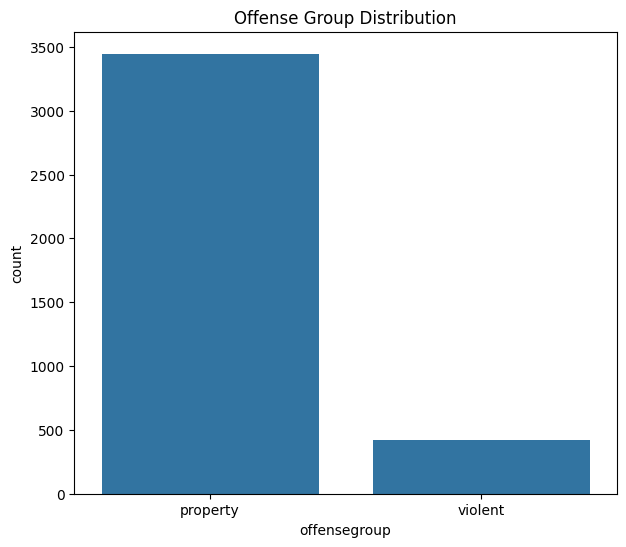

In [82]:
plt.figure(figsize=(7,6))
sns.countplot(data=df, x='offensegroup')
plt.title("Offense Group Distribution")


In [83]:
# 2 Which OFFENSE types occur most frequently?

In [84]:
df['OFFENSE'].value_counts()

,count
OFFENSE,
theft/other,1610
theft f/auto,897
motor vehicle theft,797
robbery,262
burglary,140
assault w/dangerous weapon,116
homicide,30
sex abuse,13
arson,2


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'theft/other'),
  Text(1, 0, 'theft f/auto'),
  Text(2, 0, 'motor vehicle theft'),
  Text(3, 0, 'robbery'),
  Text(4, 0, 'burglary'),
  Text(5, 0, 'assault w/dangerous weapon'),
  Text(6, 0, 'homicide'),
  Text(7, 0, 'sex abuse'),
  Text(8, 0, 'arson')])

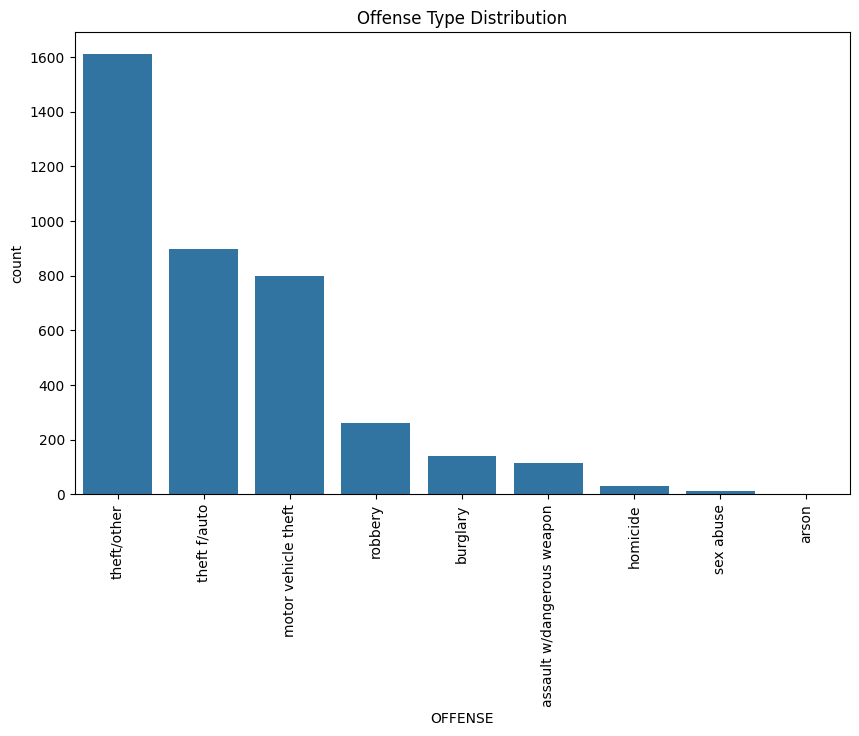

In [85]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='OFFENSE')
plt.title("Offense Type Distribution")
plt.xticks(rotation=90)

In [86]:
# 3 How many crimes occurred in each SHIFT (day/evening/midnight)?

In [87]:
df['SHIFT'].value_counts()

,count
SHIFT,
Evening,1663
Day,1513
Midnight,691


Text(0.5, 1.0, 'Shift Distribution')

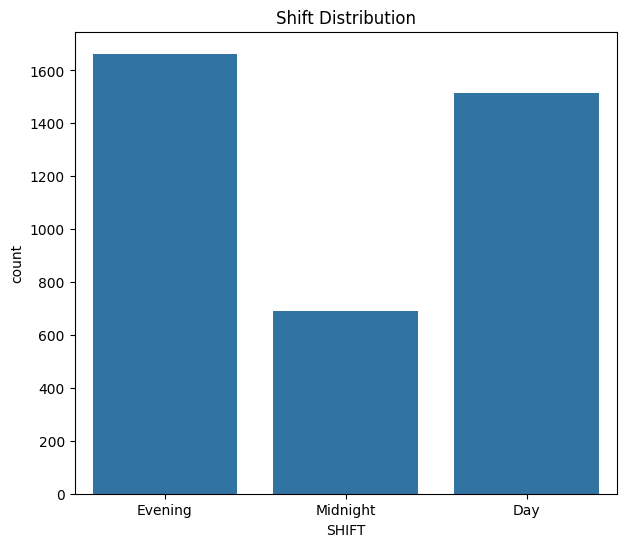

In [88]:
plt.figure(figsize=(7,6))
sns.countplot(data=df, x='SHIFT')
plt.title("Shift Distribution")

In [89]:
# 4 What is the monthly/weekly/date-wise trend of crimes (using REPORT_DATE)?

In [90]:
df['REPORT_MONTH'].value_counts()

,count
REPORT_MONTH,
January,2033
February,1834


Text(0.5, 1.0, 'Monthly Distribution')

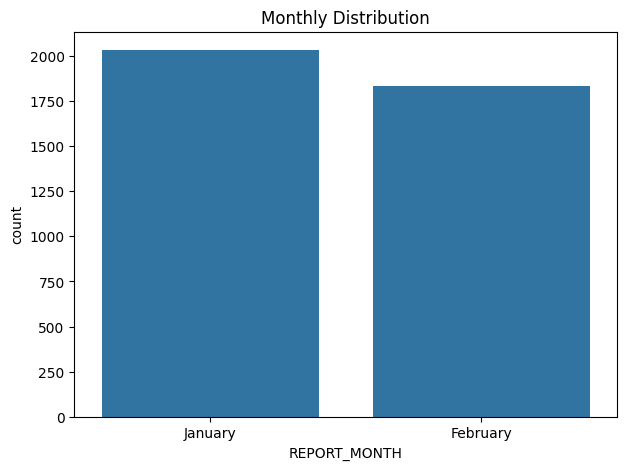

In [91]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='REPORT_MONTH')
plt.title("Monthly Distribution")

In [92]:
# 5 What are the top 10 crime types by ucr-rank?

In [93]:
df.groupby('OFFENSE')['ucr-rank'].value_counts().head(10)

,,count
OFFENSE,ucr-rank,
arson,9,2
assault w/dangerous weapon,3,116
burglary,5,140
homicide,1,30
motor vehicle theft,8,797
robbery,4,262
sex abuse,2,13
theft f/auto,7,897
theft/other,6,1610


/tmp/ipython-input-277760515.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='ucr-rank', palette="viridis")


Text(0.5, 1.0, 'Top 10 Crime Types by ucr-rank')

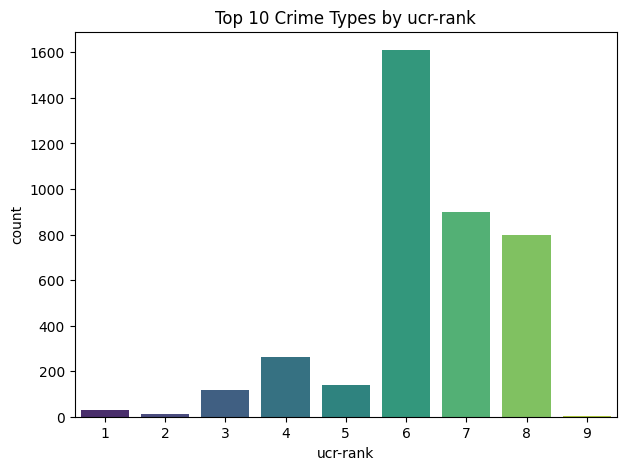

In [94]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='ucr-rank', palette="viridis")
plt.title("Top 10 Crime Types by ucr-rank")

In [95]:
# 6 Which NEIGHBORHOOD_CLUSTER  has the highest number of crimes?

In [96]:
df1= df['NEIGHBORHOOD_CLUSTER'].value_counts().head(10).reset_index()

In [97]:
df1

,NEIGHBORHOOD_CLUSTER,count
0,cluster 2,291
1,cluster 23,264
2,cluster 25,252
3,cluster 8,231
4,cluster 21,223
5,cluster 18,204
6,cluster 17,165
7,cluster 3,160
8,cluster 6,144
9,cluster 39,141


/tmp/ipython-input-357243945.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, x=df1["NEIGHBORHOOD_CLUSTER"], y=df1["count"], palette="Set2")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'cluster 2'),
  Text(1, 0, 'cluster 23'),
  Text(2, 0, 'cluster 25'),
  Text(3, 0, 'cluster 8'),
  Text(4, 0, 'cluster 21'),
  Text(5, 0, 'cluster 18'),
  Text(6, 0, 'cluster 17'),
  Text(7, 0, 'cluster 3'),
  Text(8, 0, 'cluster 6'),
  Text(9, 0, 'cluster 39')])

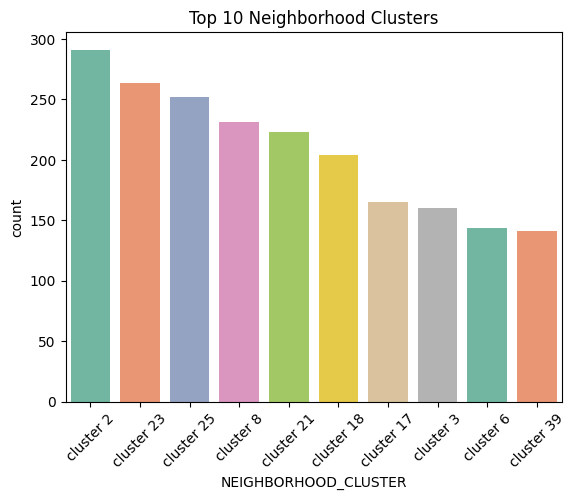

In [98]:
sns.barplot(data=df1, x=df1["NEIGHBORHOOD_CLUSTER"], y=df1["count"], palette="Set2")
plt.title("Top 10 Neighborhood Clusters")
plt.xticks(rotation=45)

In [99]:
# 7 Which PSA reports the most incidents?

In [100]:
df['PSA_Group'].value_counts()

,count
PSA_Group,
PSA Group 5,781
PSA Group 3,666
PSA Group 2,652
PSA Group 4,610
PSA Group 1,464
PSA Group 6,405
PSA Group 7,289


/tmp/ipython-input-20804723.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='PSA_Group', palette="viridis")


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'PSA Group 5'),
  Text(1, 0, 'PSA Group 2'),
  Text(2, 0, 'PSA Group 3'),
  Text(3, 0, 'PSA Group 4'),
  Text(4, 0, 'PSA Group 1'),
  Text(5, 0, 'PSA Group 6'),
  Text(6, 0, 'PSA Group 7')])

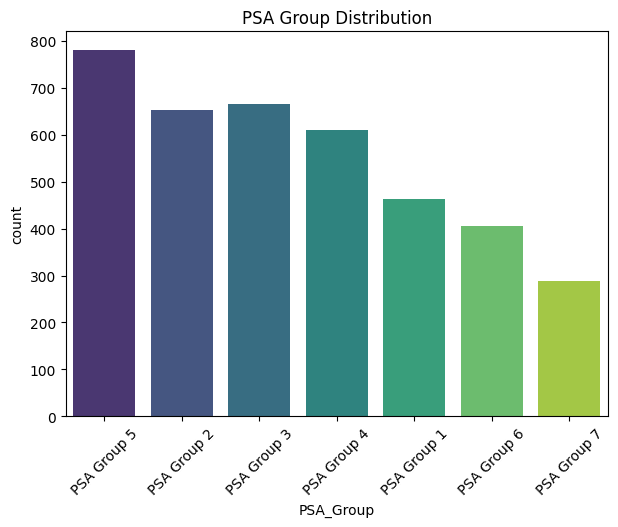

In [101]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='PSA_Group', palette="viridis")
plt.title("PSA Group Distribution")
plt.xticks(rotation=45)

In [102]:
# 8 Which DISTRICT (1D, 3D, 4D,etc.) has the highest crime?

In [103]:
df['District_Label'].value_counts()

,count
District_Label,
District 5D,781
District 3D,666
District 2D,652
District 4D,610
District 1D,464
District 6D,405
District 7D,289


/tmp/ipython-input-2568246682.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='District_Label', palette="viridis")


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'District 5D'),
  Text(1, 0, 'District 2D'),
  Text(2, 0, 'District 3D'),
  Text(3, 0, 'District 4D'),
  Text(4, 0, 'District 1D'),
  Text(5, 0, 'District 6D'),
  Text(6, 0, 'District 7D')])

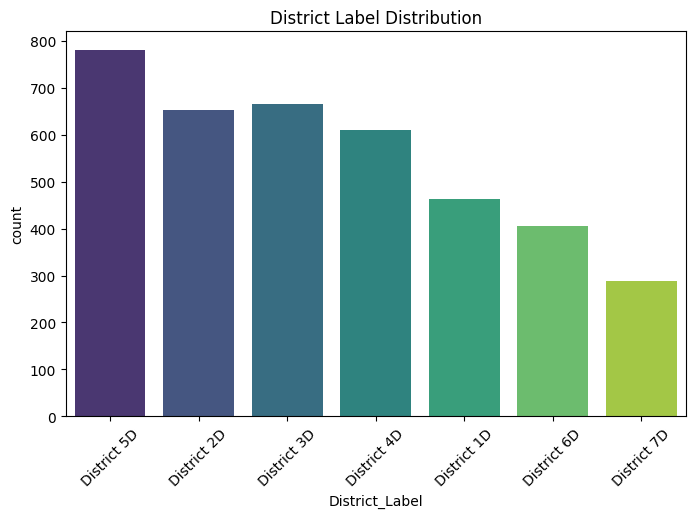

In [104]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='District_Label', palette="viridis")
plt.title("District Label Distribution")
plt.xticks(rotation=45)

In [105]:
# 9 Which ANC has the highest crime counts?

In [106]:
df2 = df['ANC'].value_counts().head(10).reset_index()

In [107]:
df2

,ANC,count
0,5D,250
1,2C,205
2,1A,166
3,5C,160
4,1B,151
5,4B,146
6,5F,143
7,6E,125
8,7C,117
9,7D,114


/tmp/ipython-input-2334074903.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df2, x=df2["ANC"], y=df2["count"], palette="Set1")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '5D'),
  Text(1, 0, '2C'),
  Text(2, 0, '1A'),
  Text(3, 0, '5C'),
  Text(4, 0, '1B'),
  Text(5, 0, '4B'),
  Text(6, 0, '5F'),
  Text(7, 0, '6E'),
  Text(8, 0, '7C'),
  Text(9, 0, '7D')])

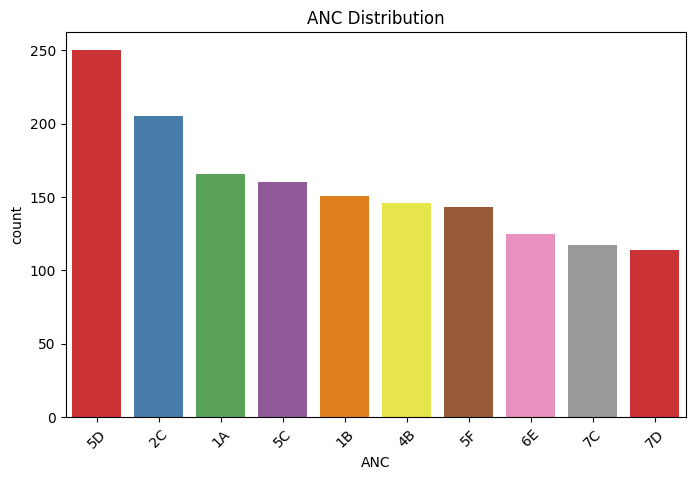

In [108]:
plt.figure(figsize=(8,5))
sns.barplot(data=df2, x=df2["ANC"], y=df2["count"], palette="Set1")
plt.title("ANC Distribution")
plt.xticks(rotation=45)

In [109]:
# 10 Which WARD experiences the most crime?

In [110]:
df['Ward_Name'].value_counts()

,count
Ward_Name,
Ward 5,789
Ward 2,555
Ward 1,507
Ward 6,473
Ward 4,453
Ward 7,437
Ward 8,378
Ward 3,275


/tmp/ipython-input-1754923596.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Ward_Name', palette="Accent")


Text(0.5, 1.0, 'Ward Name Distribution')

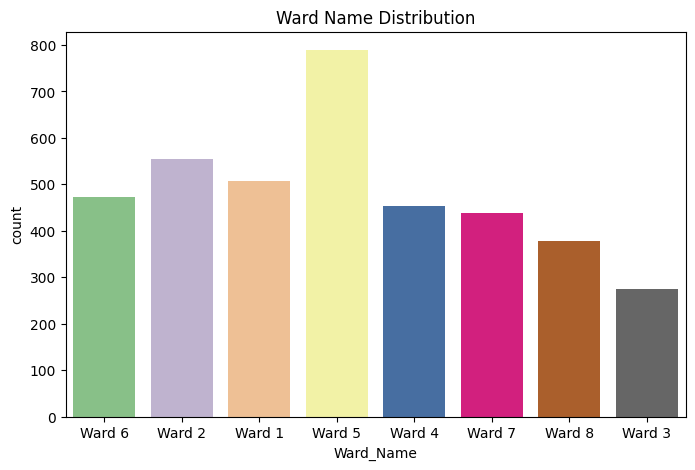

In [111]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Ward_Name', palette="Accent")
plt.title("Ward Name Distribution")

In [112]:
# 11 How many crimes involved Weapons vs 'Others'(METHOD)?

In [113]:
df['METHOD_FLAG'].value_counts()

,count
METHOD_FLAG,
Other,3523
Weapon,344


/tmp/ipython-input-1696298913.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='METHOD_FLAG', palette="PiYG")


Text(0.5, 1.0, 'Method Flag Distribution')

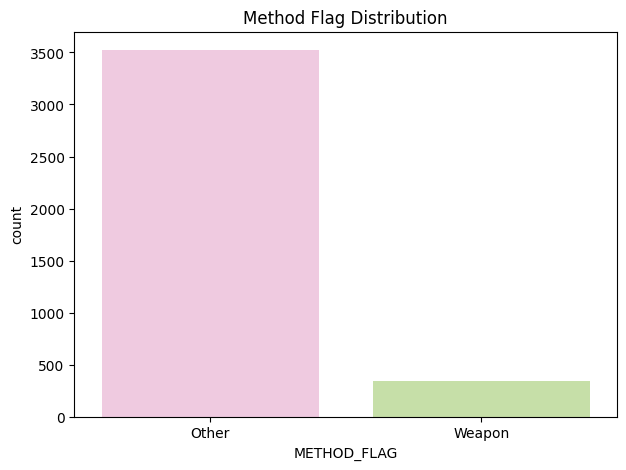

In [114]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='METHOD_FLAG', palette="PiYG")
plt.title("Method Flag Distribution")

In [115]:
# 12 What is the hourly trend of crimes based on START_DATE time?

In [116]:
df3 = df['START_DATE'].value_counts().head(10).reset_index()

In [117]:
df3

,START_DATE,count
0,2025-02-13,93
1,2025-01-24,93
2,2025-01-29,87
3,2025-01-04,85
4,2025-01-17,84
5,2025-01-03,84
6,2025-02-10,83
7,2025-01-25,82
8,2025-02-21,82
9,2025-02-17,80


/tmp/ipython-input-2281781020.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df3, x=df3["START_DATE"], y=df3["count"], palette="RdPu")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '2025-02-13'),
  Text(1, 0, '2025-01-24'),
  Text(2, 0, '2025-01-29'),
  Text(3, 0, '2025-01-04'),
  Text(4, 0, '2025-01-17'),
  Text(5, 0, '2025-01-03'),
  Text(6, 0, '2025-02-10'),
  Text(7, 0, '2025-01-25'),
  Text(8, 0, '2025-02-21'),
  Text(9, 0, '2025-02-17')])

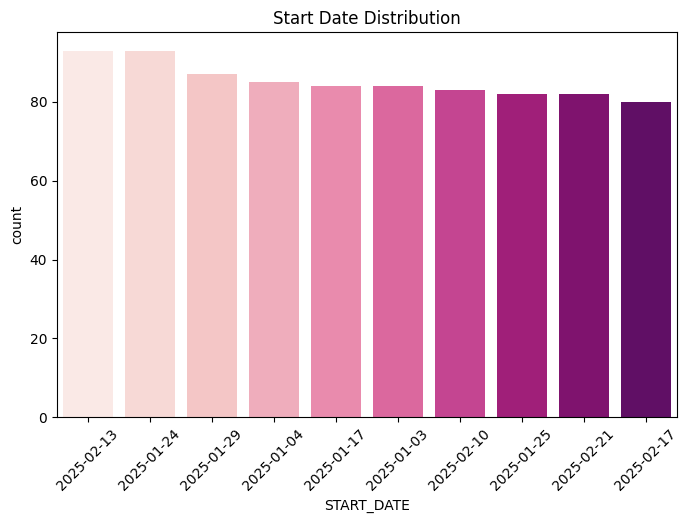

In [118]:
plt.figure(figsize=(8,5))
sns.barplot(data=df3, x=df3["START_DATE"], y=df3["count"], palette="RdPu")
plt.title("Start Date Distribution")
plt.xticks(rotation=45)

In [119]:
# 13 How long do incidents last (END_DATE - START_DATE)? (Duration Distribution)

In [120]:
df['Incident_Duration_Minutes'].value_counts().head(10)

,count
Incident_Duration_Minutes,
Unsolved,285
1,125
5,124
2,99
10,98
30,82
60,77
3,61
15,58


In [121]:
# 14 Which streets or blocks(BLOCK column) show repeated crimes?

In [122]:
df4 = df['BLOCK'].value_counts().head(10).reset_index()

In [123]:
df4

,BLOCK,count
0,3100 - 3299 block of 14th street nw,63
1,500 - 799 block of rhode island avenue ne,47
2,2000 - 2099 block of 8th street nw,30
3,1100 - 1199 block of vermont avenue nw,26
4,1000 - 1099 block of 16th street nw,23
5,1300 - 1399 block of 5th street ne,21
6,2300 - 2499 block of washington place ne,20
7,600 - 699 block of 11th street nw,19
8,3700 - 3749 block of newark street nw,19
9,1300 - 1399 block of okie street ne,18


/tmp/ipython-input-1961339041.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df4, x=df4["BLOCK"], y=df4["count"], palette="Set3")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '3100 - 3299 block of 14th street nw'),
  Text(1, 0, '500 - 799 block of rhode island avenue ne'),
  Text(2, 0, '2000 - 2099 block of 8th street nw'),
  Text(3, 0, '1100 - 1199 block of vermont avenue nw'),
  Text(4, 0, '1000 - 1099 block of 16th street nw'),
  Text(5, 0, '1300 - 1399 block of 5th street ne'),
  Text(6, 0, '2300 - 2499 block of washington place ne'),
  Text(7, 0, '600 - 699 block of 11th street nw'),
  Text(8, 0, '3700 - 3749 block of newark street nw'),
  Text(9, 0, '1300 - 1399 block of okie street ne')])

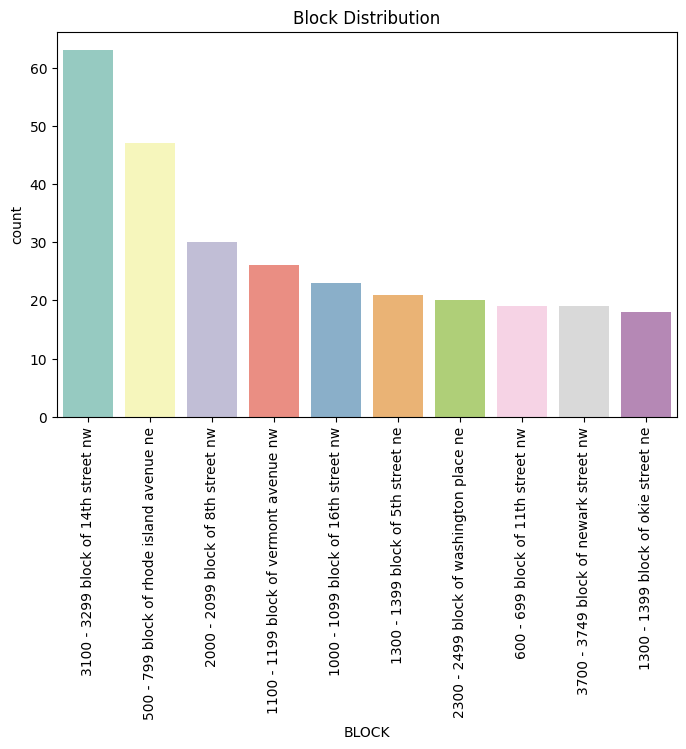

In [124]:
plt.figure(figsize=(8,5))
sns.barplot(data=df4, x=df4["BLOCK"], y=df4["count"], palette="Set3")
plt.title("Block Distribution")
plt.xticks(rotation=90)

In [125]:
# 15 Which geographic areas show clusters of crimes?

In [126]:
df.columns

Index(['Sr. No.', 'ANC', 'LATITUDE', 'Lat_Rounded', 'BLOCK', 'Block_Count',
       'Average_Count', 'Is_HighCrime_Block', 'offensegroup', 'MAIN_OFFENSE',
       'location', 'sector', 'YBLOCK', 'METHOD', 'METHOD_FLAG', 'CCN',
       'END_DATE', 'END_TIME', 'offense-text', 'SUB_OFFENSE',
       'NEIGHBORHOOD_CLUSTER', 'SHIFT', 'PSA', 'PSA_Group', 'CENSUS_TRACT',
       'WARD', 'Ward_Name', 'BID', 'OCTO_RECORD_ID', 'DISTRICT',
       'District_Label', 'XBLOCK', 'YEAR', 'REPORT_DATE', 'REPORT_TIME',
       'REPORT_DAY_NAME', 'Report_Hour', 'Is_Weekend', 'REPORT_MONTH',
       'REPORT_WEEKNUM', 'ucr-rank', 'offensekey', 'START_DATE', 'START_TIME',
       'START_HOUR', 'VOTING_PRECINCT', 'OFFENSE', 'Offense_Category',
       'BLOCK_GROUP', 'Case_OpenClose', 'Address_Clean',
       'Incident_Duration_Minutes'],
      dtype='object')

In [127]:
df5 = df['Lat_Rounded'].value_counts().head(10).reset_index()

In [128]:
df5

,Lat_Rounded,count
0,38.905,123
1,38.903,106
2,38.906,100
3,38.900,95
4,38.917,94
5,38.910,90
6,38.930,90
7,38.908,79
8,38.901,75
9,38.921,74


/tmp/ipython-input-1668142666.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df5, x=df5["Lat_Rounded"], y=df5["count"], palette="viridis")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '38.9'),
  Text(1, 0, '38.901'),
  Text(2, 0, '38.903'),
  Text(3, 0, '38.905'),
  Text(4, 0, '38.906'),
  Text(5, 0, '38.908'),
  Text(6, 0, '38.91'),
  Text(7, 0, '38.917'),
  Text(8, 0, '38.921'),
  Text(9, 0, '38.93')])

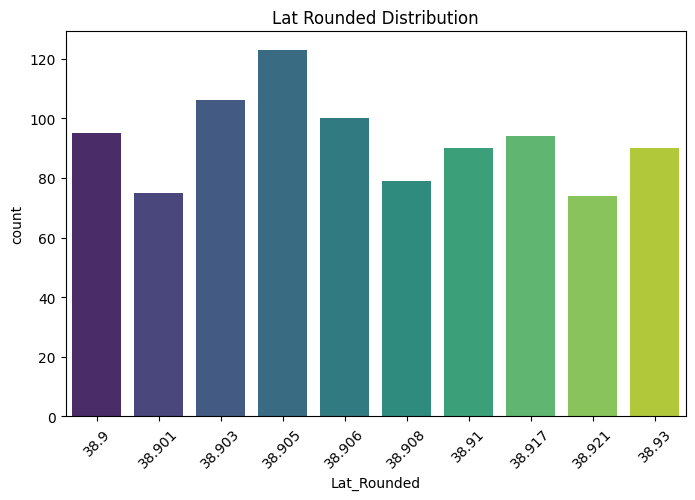

In [129]:
plt.figure(figsize=(8,5))
sns.barplot(data=df5, x=df5["Lat_Rounded"], y=df5["count"], palette="viridis")
plt.title("Lat Rounded Distribution")
plt.xticks(rotation=45)